# Data Project - Stock Market Analysis
Welcome to my Stock Market Analysis project! In this portfolio project i will be looking at data from the stock market, particularly 4 healthcare stocks namely Pfizer Inc,Novartis AG,GlaxoSmithKline plc and Johnson & Johnson. I will use pandas to get stock information, visualize different aspects of it, and finally i will look at a few ways of analyzing the risk of a stock, based on its previous performance history.

I will be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?

In [1]:
#First a peep of the stock i will work on
import pandas as pd


In [2]:
url = 'https://finance.yahoo.com/screener/predefined/healthcare/?count=25&offset=0'

In [3]:
peepstock = pd.read_html(url)

In [4]:
peepstock[0]

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,JNJ,Johnson & Johnson,148.29,-1.75,-1.17%,7.03M,11.824M,390.683B,23.14,NaN
1,UNH,UnitedHealth Group Incorporated,284.51,-7.96,-2.72%,3.404M,6.23M,269.879B,19.91,NaN
2,PFE,Pfizer Inc.,37.64,-0.72,-1.88%,21.085M,32.569M,208.813B,13.45,NaN
3,MRK,"Merck & Co., Inc.",77.67,-1.67,-2.10%,8.79M,14.402M,196.124B,19.69,NaN
4,NVS,Novartis AG,83.41,-1.32,-1.56%,1.396M,2.911M,190.267B,15.85,NaN
...,...,...,...,...,...,...,...,...,...,...
95,ABMD,"Abiomed, Inc.",183.49,-7.76,-4.06%,835930,790184,8.163B,41.42,NaN
96,ICLR,ICON Public Limited Company,154.15,-6.32,-3.94%,329824,356052,8.094B,22.74,NaN
97,PPD,"PPD, Inc.",22.72,-1.18,-4.94%,487566,2.331M,7.92B,119.58,NaN
98,TXG,"10x Genomics, Inc.",78.41,-1.46,-1.83%,613999,582117,7.571B,NaN,NaN


##### Analysis of Stock Information
In this section i will be requesting stock information with pandas, and analyze basic attributes of a stock.

In [5]:
#Let's go ahead and start with some imports
# For division
from __future__ import division
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as dr


# For time stamps
from datetime import datetime



C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###### The healthcare stocks symbols  i will use for this analysis
PFE	Pfizer Inc.	
NVS	Novartis AG	
GSK	GlaxoSmithKline plc	
JNJ	Johnson & Johnson

In [6]:
care_list = ['PFE','NVS','GSK','JNJ']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in care_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = dr.data.get_data_yahoo(stock,start,end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play around with the PFE(Pfizer Inc) DataFrame to get a feel for the data

In [7]:
PFE.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-03,41.500000,41.029999,41.220001,41.389999,17708500.0,39.849743
2019-05-06,41.770000,40.840000,40.910000,41.650002,24642700.0,40.100071
2019-05-07,41.709999,40.500000,41.389999,40.830002,26189600.0,39.310589


In [8]:
# Summary Stats
PFE.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,38.322778,37.571905,37.951587,37.935317,2.478479e+07,37.349331
std,3.196666,3.410101,3.331834,3.311669,1.210508e+07,2.992378
min,29.580000,27.879999,28.760000,28.490000,4.921900e+06,28.490000
25%,36.302501,35.580002,35.952499,35.922501,1.682850e+07,35.448129
50%,38.070000,37.370001,37.775000,37.650000,2.113745e+07,37.321747
75%,40.802500,40.135001,40.304999,40.524999,2.864105e+07,39.508679
max,44.560001,43.980000,44.369999,44.400002,9.083460e+07,43.126865


In [9]:
# General Info
PFE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-05-03 to 2020-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


i now plot out the volume and closing price of the stock

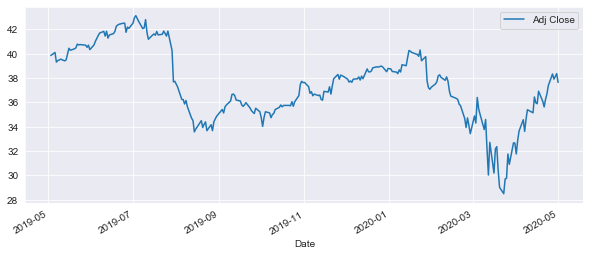

In [10]:
# Let's see a historical view of the closing price
PFE['Adj Close'].plot(legend=True,figsize=(10,4))

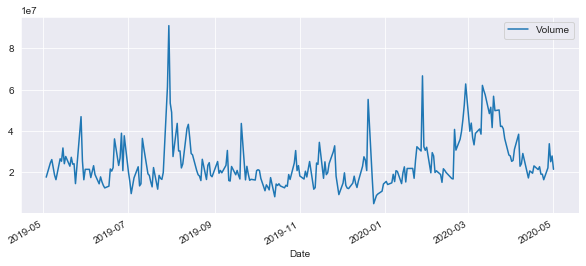

In [11]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
PFE['Volume'].plot(legend=True,figsize=(10,4))

Now that i have shown the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations.

Simple moving averages (SMA) take the arithmetic mean of a given set of prices over the past number of days, for example over the previous 15, 30, 100, or 200 days.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [12]:
#Let's go ahead and plot out several moving averages

moving_avg_day = [10,20,50]

for numdays in moving_avg_day:
    column_name = "MA for %s days" %(str(numdays))
    PFE[column_name] = pd.Series(PFE['Adj Close']).rolling(window=numdays).mean()

Now let's go ahead and plot all the additional Moving Averages


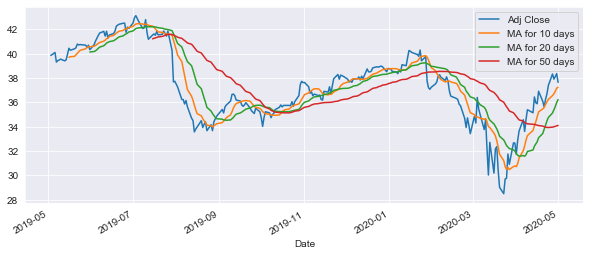

In [13]:

PFE[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

Daily Return Analysis

Now that i have done some baseline analysis, let's go ahead and dive a little deeper. i am now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Pfrizer stock.

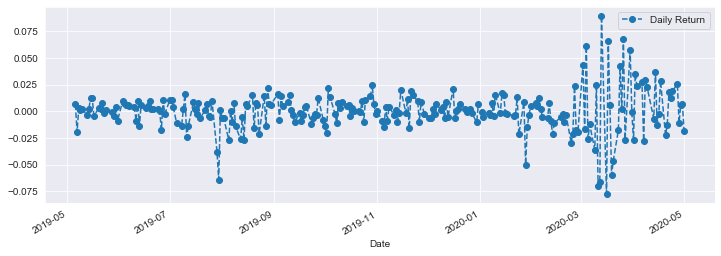

In [14]:
# We'll use pct_change to find the percent change for each day
PFE['Daily Return'] = PFE['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
PFE['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

 now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

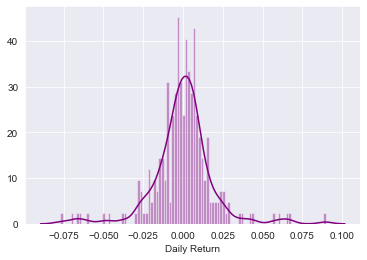

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(PFE['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#PFE['Daily Return'].hist()

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes

In [16]:
# Grab all the closing prices for the healthcare stock list into one DataFrame
closing_price = dr.data.get_data_yahoo(care_list,start,end)['Adj Close']

In [17]:
closing_price.head()

Symbols,PFE,NVS,GSK,JNJ
Date,,,,
2019-05-03,39.849743,79.717178,38.841476,138.151672
2019-05-06,40.100071,79.871567,38.631783,138.229492
2019-05-07,39.310589,78.231102,37.735813,136.167099
2019-05-08,39.426113,79.003090,37.878788,135.991974
2019-05-09,39.474682,78.144257,37.802532,134.960800


Now that i have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Pfizer Inc stock.

In [18]:
# Make a new tech returns DataFrame
Healthcare_rets = closing_price.pct_change()

Now i can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

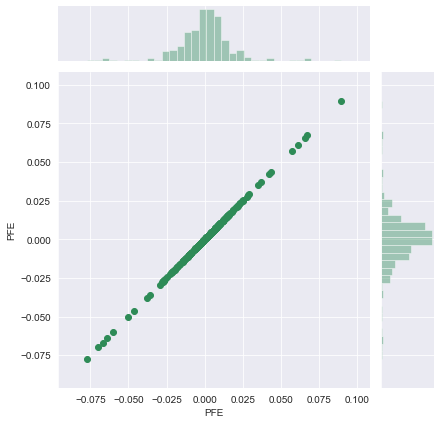

In [19]:
# Comparing Pfizer to itself should show a perfectly linear relationship
sns.jointplot('PFE','PFE',Healthcare_rets,kind='scatter',color='seagreen')

So now i can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Pfizer and GlaxoSmithKline the same way.

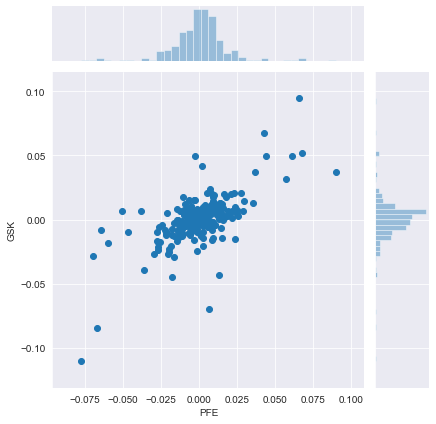

In [20]:
sns.jointplot('PFE','GSK',Healthcare_rets,kind='scatter')

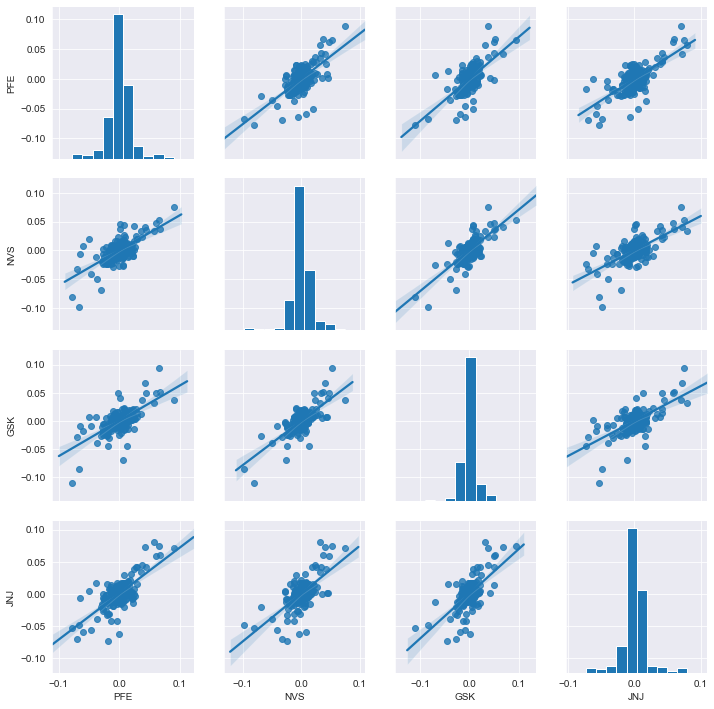

In [21]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(Healthcare_rets.dropna(),kind="reg")

In [22]:
# Let's go ahead and look for the  correlation  for the daily returns
Healthcare_rets.corr()


Symbols,PFE,NVS,GSK,JNJ
Symbols,,,,
PFE,1.000000,0.681406,0.667033,0.717577
NVS,0.681406,1.000000,0.746412,0.665534
GSK,0.667033,0.746412,1.000000,0.656851
JNJ,0.717577,0.665534,0.656851,1.000000


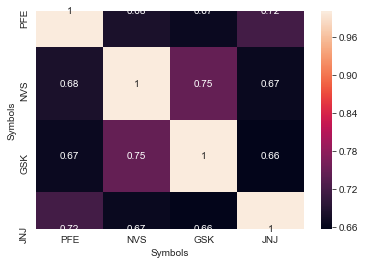

In [23]:
sns.heatmap(Healthcare_rets.corr(),annot=True)

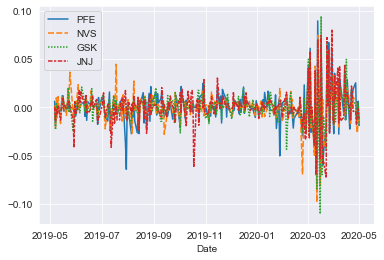

In [24]:

sns.lineplot(data=Healthcare_rets) #to see how each stock returned over the period

It could gathered from this plot , the stocks were generally voliate during March and April.

i see here numerically and visually that Novartis AG and GlaxoSmithKline plc had the strongest correlation of daily stock return. It's also interesting to see that all the healthcare companies are positively correlated.

let's go ahead and start looking deeper into actual risk analysis

###### Risk Analysis

There are many ways i can quantify risk, one of the most basic ways using the information i have gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

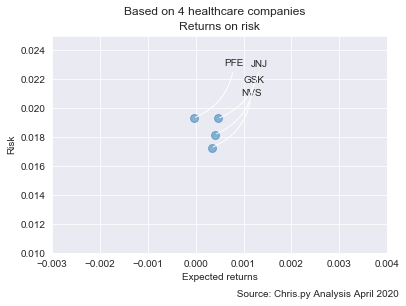

In [25]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal Healthcare_rets DataFrame
care_rets = Healthcare_rets.dropna()

area = np.pi*20  # I'll be using the area to define size of these circles for the scatter plot. so that we can see it better.


plt.scatter(care_rets.mean(), care_rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot 
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('Returns on risk')
plt.suptitle('Based on 4 healthcare companies')
plt.text(0.0008,0.007,' Source: Chris.py Analysis April 2020')


# Label the scatter plots, 
for label, x, y in zip(care_rets.columns, care_rets.mean(), care_rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    
        

Inituitively i would like to pick a stock with  high expected returns and a low risk. In this 
analysis the GSK (GlaxoSmithKline plc) suits this requirement

###### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. i can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods i can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method i will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and get the daily returns histogram for NVS(Novartis AG) stock.

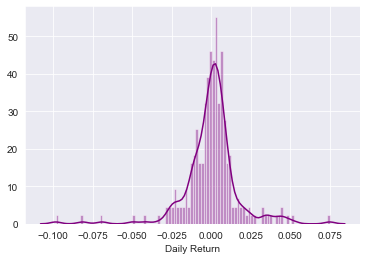

In [26]:
NVS['Daily Return'] = NVS['Adj Close'].pct_change()
sns.distplot(NVS['Daily Return'].dropna(),bins=100,color='purple')

In [27]:
care_rets.head()

Symbols,PFE,NVS,GSK,JNJ
Date,,,,
2019-05-06,0.006282,0.001937,-0.005399,0.000563
2019-05-07,-0.019688,-0.020539,-0.023193,-0.014920
2019-05-08,0.002939,0.009868,0.003789,-0.001286
2019-05-09,0.001232,-0.010871,-0.002013,-0.007583
2019-05-10,0.001968,0.011114,-0.003278,0.002307


Now i can use quantile to get the risk value for the stock.

In [28]:
#I am using 0.05 empirical quantile of daily returns
care_rets.NVS.quantile(0.05)

-0.023722291231508708

The 0.05 empirical quantile of daily returns is at -0.023 on NVS(Novartis AG). That means that with 95% confidence, my worst daily loss will not exceed 2.37%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0237 * 1,000,000 = $23,700. 

for the rest of the stock , i repeat same process

In [29]:
print(care_rets.PFE.quantile(0.05))
print(care_rets.GSK.quantile(0.05))
print(care_rets.JNJ.quantile(0.05))

-0.02726992995827926
-0.023527400557368294
-0.029302826638840984


my worst daily loss at $1,000,000:

PFE Pfizer Inc.  =$27,200

GSK GlaxoSmithKline plc = $23,500

JNJ Johnson & Johnson = $29,300
